In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os
import seaborn as sns

In [2]:
# Read CSVs
PatientConsumption = pd.read_csv('PatientConsumption 2018-2019.csv').drop_duplicates()
PurchasedOrders    = pd.read_csv('PurchasedOrders 2018-2019.csv').drop_duplicates()
IncompleteOrders   = pd.read_csv('IncompleteOrders 2018-2019.csv').drop_duplicates()
PatentDrugs        = pd.read_csv('PatentDrugs.csv').drop_duplicates()

# Retrieve date columns and apply to_datetime
date_columns = [column for column in PatientConsumption.columns if 'Date' in column]
PatientConsumption[date_columns] = PatientConsumption[date_columns].apply(pd.to_datetime)

date_columns = [column for column in PurchasedOrders.columns if 'Date' in column]
PurchasedOrders[date_columns] = PurchasedOrders[date_columns].apply(pd.to_datetime)

date_columns = [column for column in IncompleteOrders.columns if 'Date' in column]
IncompleteOrders[date_columns] = IncompleteOrders[date_columns].apply(pd.to_datetime)

_______________

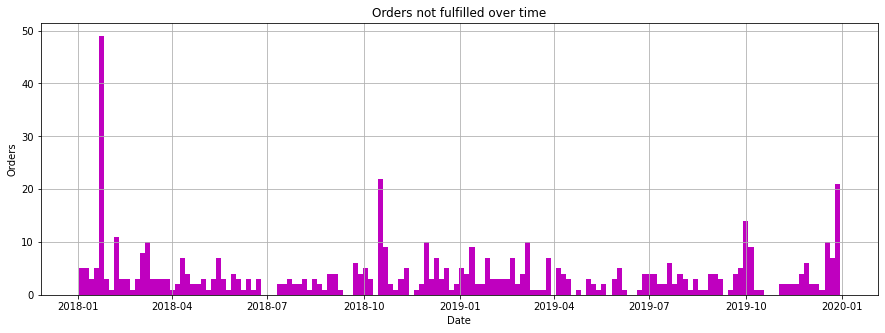

In [3]:
Shortages = PurchasedOrders[PurchasedOrders['AmountPurchased']==0]

plt.figure(figsize=(15, 5))
plt.hist(Shortages.RequestDate, bins = 150, facecolor='m')

plt.title('Orders not fulfilled over time')
plt.xlabel('Date')
plt.ylabel('Orders')

plt.grid(True)
plt.show()

# Part 1
Merge the dictionary with the PurchasedOrders database to keep only the **patent** drugs

In [4]:
PurchasedOrders.head()

,RequestNumber,RequestDate,PurchaseNumber,OrderDate,RequiredDeliveryDate,SupplierName,MedCode,MedDescription,Outflow,AmountRequested,AmountPurchased
0,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,BOLENTAX (ENOXAPARINA) 40 MG/0.4 ML JER PRELL C/2,15.0,5.0,6
1,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304883,BOLENTAX (ENOXAPARINA) 60 MG/0.6 ML JER PRELL C/2,14.0,2.0,2
2,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304284,FRESUBIN PLUS VAINILLA 236 ML. FÓRMULA ENTERAL,15.0,5.0,5
3,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3302098,NODESCRON 4MG AMPOLLETA (VECURONIO) PISA,39.0,40.0,50
4,52670,2018-01-02,257785.0,2018-01-02,2018-01-03,"NADRO, S.A.P.I. DE C.V.",3301771,SOMAZINA 1G AMP 4ML (CITICOLINA),424.0,10.0,10


In [5]:
PatentDrugs['MedCode'] = PatentDrugs['MedCode'].astype(str)
PurchasedOrders['MedCode'] = PurchasedOrders['MedCode'].astype(str)
PatentOrders = pd.merge(PurchasedOrders, PatentDrugs, on='MedCode').drop(columns='MedDescription_x').rename(columns={'MedDescription_y':'MedDescription'})
PatentOrders.head(7)

,RequestNumber,RequestDate,PurchaseNumber,OrderDate,RequiredDeliveryDate,SupplierName,MedCode,Outflow,AmountRequested,AmountPurchased,MedDescription,MedPharmacon,MedFamily,MedPriceMXN
0,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,15.0,5.0,6,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),BOLENTAX,Sangre y órganos hematopoyéticos,694.0
1,52734,2018-01-04,258004.0,2018-01-04,2018-01-05,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,19.0,2.0,2,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),BOLENTAX,Sangre y órganos hematopoyéticos,694.0
2,52882,2018-01-15,258670.0,2018-01-15,2018-01-16,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,16.0,2.0,2,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),BOLENTAX,Sangre y órganos hematopoyéticos,694.0
3,52950,2018-01-17,258882.0,2018-01-17,2018-01-18,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,13.0,2.0,2,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),BOLENTAX,Sangre y órganos hematopoyéticos,694.0
4,52980,2018-01-19,259057.0,2018-01-19,2018-01-22,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,21.0,5.0,6,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),BOLENTAX,Sangre y órganos hematopoyéticos,694.0
5,53200,2018-01-30,259808.0,2018-01-30,2018-01-31,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,15.0,4.0,4,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),BOLENTAX,Sangre y órganos hematopoyéticos,694.0
6,53227,2018-02-01,260010.0,2018-02-01,2018-02-02,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,12.0,3.0,4,BOLENTAX 40MG/0.4ML C/2 JGP (ENOXAPARINA SODICA),BOLENTAX,Sangre y órganos hematopoyéticos,694.0


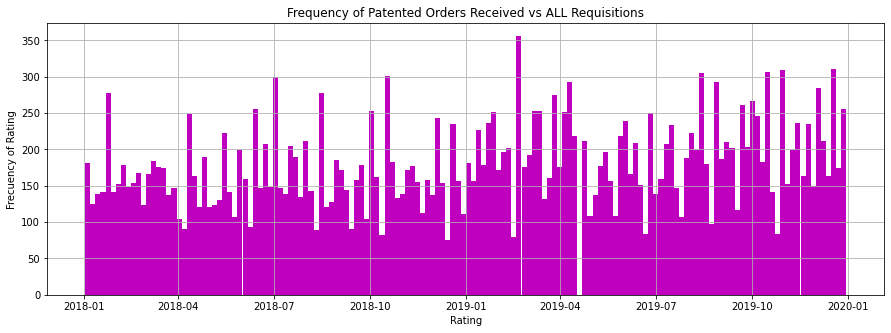

In [6]:
plt.figure(figsize=(15, 5))

plt.hist(PatentOrders.RequestDate, bins = 150, facecolor='m')

plt.title('Frequency of Patented Orders Received vs ALL Requisitions')
plt.xlabel('Rating')
plt.ylabel('Frecuency of Rating')
plt.grid(True)
plt.show()

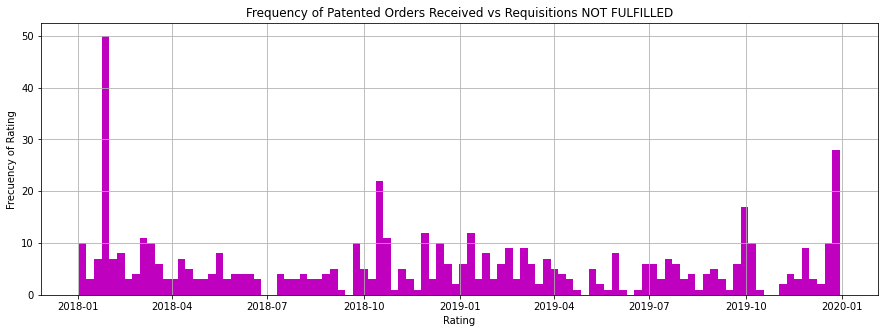

In [7]:
#NUMERO DE DESABASTOS
Shortages2 =PatentOrders[PatentOrders['AmountPurchased']==0]
plt.figure(figsize=(15, 5))
plt.hist(Shortages2.RequestDate, bins = 100, facecolor='m')
plt.title('Frequency of Patented Orders Received vs Requisitions NOT FULFILLED')
plt.xlabel('Rating')
plt.ylabel('Frecuency of Rating')
plt.grid(True)
plt.show()

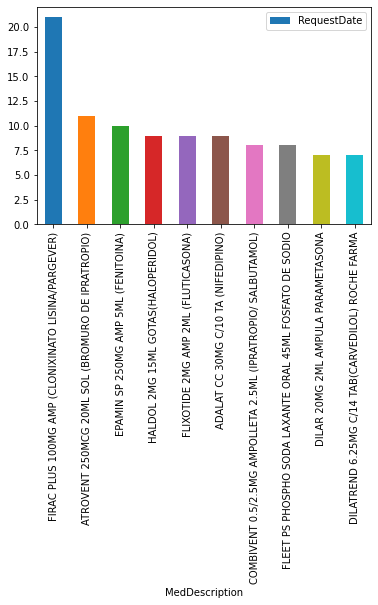

In [8]:
Shortages2.groupby('MedDescription').count().sort_values('RequestDate', ascending=False)[:10].reset_index().plot.bar(x='MedDescription', y='RequestDate');

In [9]:
Shortages2.groupby('MedDescription').sum().sort_values('AmountRequested', ascending=False).head(7)

,RequestNumber,PurchaseNumber,Outflow,AmountRequested,AmountPurchased,MedPriceMXN
MedDescription,,,,,,
COMBIVENT 0.5/2.5MG AMPOLLETA 2.5ML (IPRATROPIO/ SALBUTAMOL),480424,0.0,6703.0,1200.0,0,4228.0
MEPROXIDINA 200MCG/2ML (DEXMEDETOMIDINA),385291,0.0,980.0,910.0,0,1194.0
FIRAC PLUS 100MG AMP (CLONIXINATO LISINA/PARGEVER),1258644,0.0,2775.0,543.0,0,3202.5
CORPOTASIN CL C/50 TAB AMSTRONG,52984,0.0,413.0,413.0,0,0.0
FLIXOTIDE 2MG AMP 2ML (FLUTICASONA),593804,0.0,61.0,140.0,0,6484.5
FALOT 1G AMP. PISA (CEFALOTINA),321705,0.0,50.0,130.0,0,845.0
AMPLIUM 1G AMP IV (MEROPENEM),106284,0.0,186.0,100.0,0,1328.0


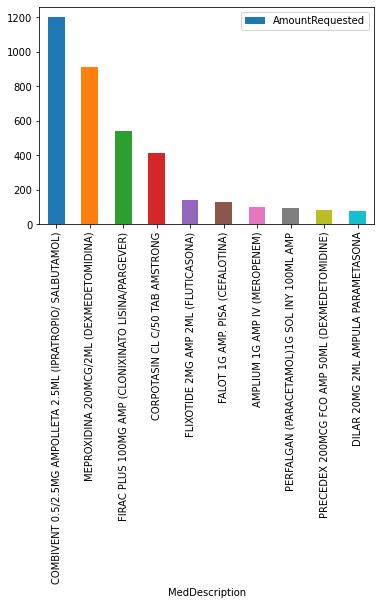

In [10]:
Shortages2.groupby('MedDescription').sum().sort_values('AmountRequested', ascending=False)[:10].reset_index().plot.bar(x='MedDescription', y='AmountRequested')

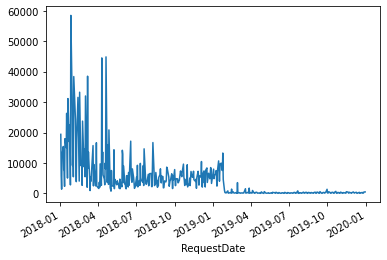

In [11]:
PatentOrders.groupby('RequestDate').sum()['Outflow'].plot()
#PREGUNTAR A JULIO

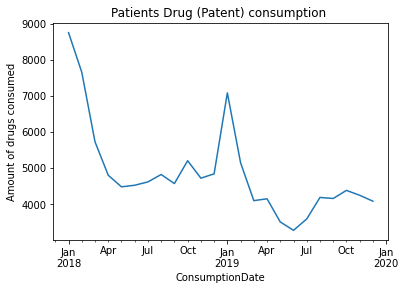

In [12]:
#CANTIDAD PEDIDA POR LOS PACIENTES
PatientConsumption.groupby('ConsumptionDate').sum()['AmmountConsumed'].plot()
plt.ylabel("Amount of drugs consumed")
plt.title("Patients Drug (Patent) consumption ");

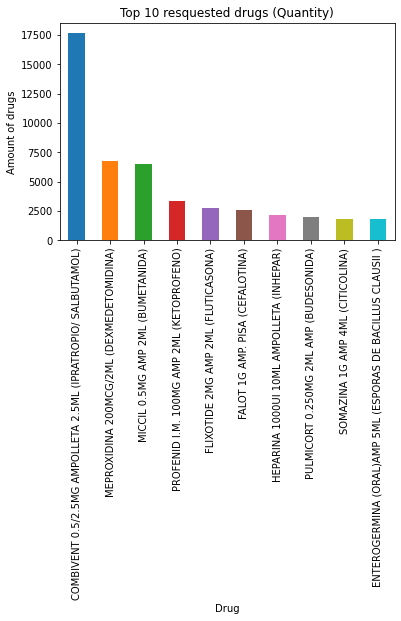

In [13]:
# Los que mas se compran
PatentOrders.groupby('MedDescription').sum().sort_values('AmountRequested', ascending=False)[:10]['AmountRequested'].plot.bar()
plt.title("Top 10 resquested drugs (Quantity)")
plt.ylabel("Amount of drugs")
plt.xlabel("Drug");

In [14]:
# Los que mas se demandan
top10_c= PatientConsumption.groupby('MedDescription').sum().sort_values('AmmountConsumed',ascending=False)[:10].reset_index()
top10_c


,MedDescription,ConsumptionNumber,MedCode,AmmountConsumed,UnitaryCost,TotalCost
0,COMBIVENT 0.5/2.5MG AMPOLLETA 2.5ML (IPRATROPI...,8.135285e+10,4.812319e+10,16997.0,443372.20,517482.09
1,MICCIL 0.5MG AMP 2ML (BUMETANIDA),2.879226e+10,1.663857e+10,7235.0,79875.48,116150.01
2,FLIXOTIDE 2MG AMP 2ML (FLUTICASONA),1.566442e+10,9.169038e+09,2843.0,126029.59,129145.96
3,PULMICORT 0.250MG 2ML AMP (BUDESONIDA),1.245980e+10,7.805417e+09,2484.0,72048.02,75560.64
4,PROFENID IM (KETOPROFENO) 100MG/2ML AMP,1.339354e+10,7.507230e+09,2281.0,161678.22,162263.89
5,ENTEROGERMINA (ORAL)AMP 5ML (ESPORAS DE BACILL...,6.539944e+09,3.822669e+09,1949.0,15994.96,26997.81
6,SOMAZINA 1G AMP 4ML (CITICOLINA),1.027621e+10,5.929981e+09,1852.0,126801.89,130868.65
7,DICYNONE 250MG AMP 2ML (ETAMSILATO),7.821405e+09,4.528975e+09,1654.0,136554.01,165263.47
8,HEPARINA 1000UI 10ML AMPOLLETA (INHEPAR),7.741466e+09,4.487607e+09,1605.0,73787.49,86787.09
9,FOSFOCIL IV 1G AMP (FOSFOMICINA),8.170725e+09,4.718552e+09,1513.0,180634.15,191124.91


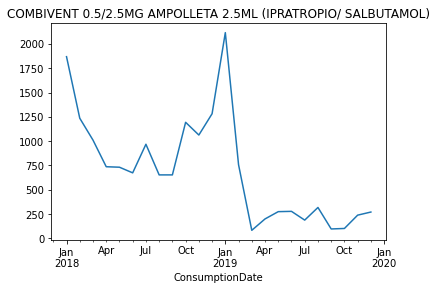

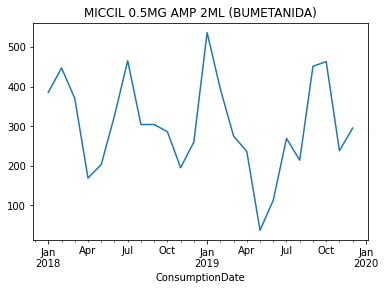

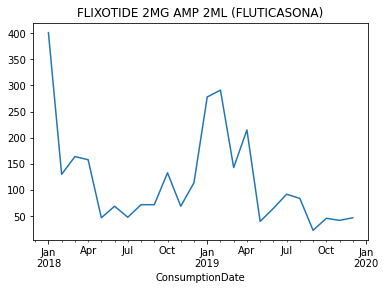

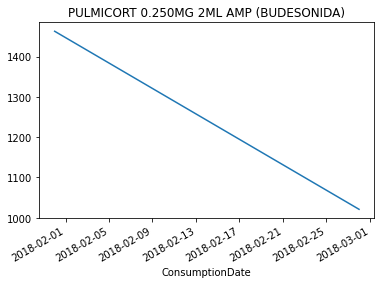

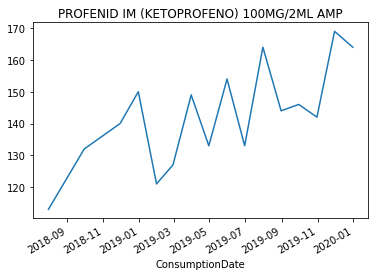

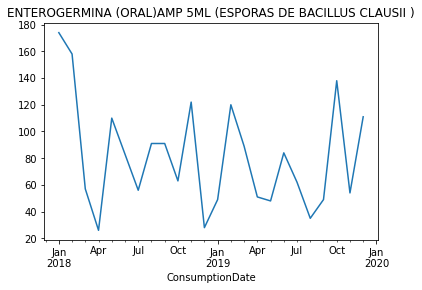

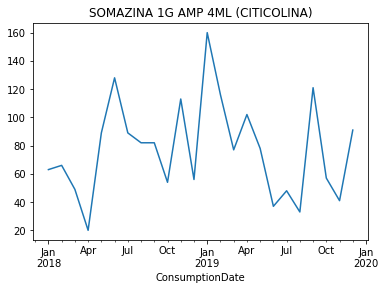

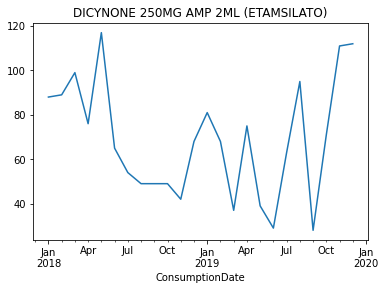

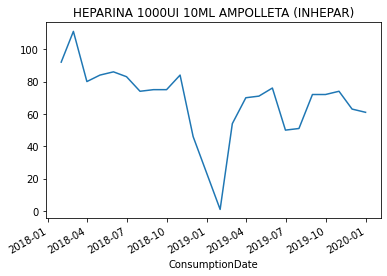

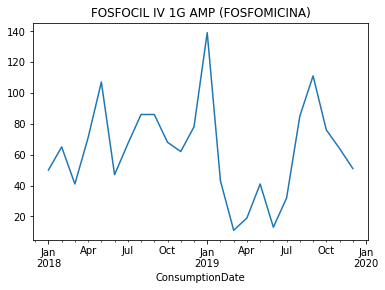

In [15]:
for i in top10_c['MedDescription']:
    plt.figure()
    PatientConsumption[PatientConsumption['MedDescription']==i].groupby('ConsumptionDate').sum()['AmmountConsumed'].plot()
    plt.title(i)

In [16]:
#GRAFICO DEL TIEMPO DE LOS MEDICAMENTOS VENDIDOS
#CALCULAR LA UTILIDAD DE LOS MEDICAMENTOS Y CUANTIFICARLA COMO COSTO DE OPORTUNIDAD DEL DESABASTO
#Proveedores a los que más se les compra

In [17]:
#VECES QUE FALTO COMO RAZÓN DEL TOTAL QUE SE PIDIÓ
veces_pedida=pd.DataFrame(PatentOrders.groupby('MedDescription').count()['RequestNumber']).sort_values('RequestNumber',ascending=False)[0:100].reset_index()
veces_faltante=pd.DataFrame(PatentOrders[PatentOrders['AmountPurchased']==0].groupby('MedDescription').count()['RequestDate']).reset_index()

veces_falto=pd.merge(veces_faltante,veces_pedida,on='MedDescription')
veces_falto['cociente']=veces_falto['RequestDate']/veces_falto['RequestNumber']
veces_falto.sort_values('cociente', ascending=False).reset_index(drop=True)[:15]

,MedDescription,RequestDate,RequestNumber,cociente
0,FLEET ENEMA AD LAB FOSF-SODIO 133ML SOL (FOSFA...,6,62,0.096774
1,ACTRON 400 400MG C/10 CAP (IBUPROFENO) LAB. BA...,7,73,0.095890
2,NIMOTOP 10MG AMP 50ML (NIMODIPINO),6,67,0.089552
3,FLIXOTIDE 2MG AMP 2ML (FLUTICASONA),9,144,0.062500
4,RENEGY 500MG/10ML AMP IV (CARBOXIMALTOSA FERRICA),5,81,0.061728
5,CUBICINE 500 MG AMP IV (DAPTOMICINA),5,87,0.057471
6,ATROVENT 250MCG 20ML SOL (BROMURO DE IPRATROPIO),11,242,0.045455
7,MEPROXIDINA 200MCG/2ML (DEXMEDETOMIDINA),6,134,0.044776
8,LIPITOR 80MG C/30 TAB(ATORVASTATINA),3,67,0.044776
9,HALOPERIL 5MG/ML AMP IM (HALOPERIDOL),4,97,0.041237


In [18]:
PatentOrders.groupby('MedFamily').count().sort_values('RequestDate', ascending=False)

,RequestNumber,RequestDate,PurchaseNumber,OrderDate,RequiredDeliveryDate,SupplierName,MedCode,Outflow,AmountRequested,AmountPurchased,MedDescription,MedPharmacon,MedPriceMXN
MedFamily,,,,,,,,,,,,,
Tracto alimentario y metabolismo,5291,5291,5212,5212,5212,5212,5291,5291,5291,5291,5291,5291,4834
Sistema cardiovascular,3629,3629,3567,3567,3567,3567,3629,3629,3629,3629,3629,3629,3303
No encontrado,2803,2803,2710,2710,2710,2710,2803,2803,2803,2803,2803,2803,2586
Antiinfecciosos para uso sistémico,2743,2743,2689,2689,2689,2689,2743,2743,2743,2743,2743,2743,2530
Sistema nervioso,2712,2712,2634,2634,2634,2634,2712,2712,2712,2712,2712,2712,2412
Sistema musculoesquelético,2600,2600,2565,2565,2565,2565,2600,2600,2600,2600,2600,2600,2487
Sistema respiratorio,2343,2343,2293,2293,2293,2293,2343,2343,2343,2343,2343,2343,2257
Sangre y órganos hematopoyéticos,1316,1316,1289,1289,1289,1289,1316,1316,1316,1316,1316,1316,1209
"Preparados hormonales sistémicos, excluyendo hormonas sexuales e insulinas",1052,1052,1026,1026,1026,1026,1052,1052,1052,1052,1052,1052,1024


In [19]:
top10_c= PatentOrders.groupby('MedFamily').sum().sort_values('AmountRequested',ascending=False)[:10].reset_index()
top10_c

,MedFamily,RequestNumber,PurchaseNumber,Outflow,AmountRequested,AmountPurchased,MedPriceMXN
0,Sistema respiratorio,139960456,6.596706e+08,348894.00,26853.00,24926,1244867.80
1,Sistema nervioso,161875053,7.578505e+08,230362.00,16282.00,14466,1289570.90
2,Sistema cardiovascular,216562957,1.025687e+09,262055.00,14688.00,14688,18735656.90
3,Antiinfecciosos para uso sistémico,164170066,7.750545e+08,174144.00,14549.00,12537,3661469.00
4,Sistema musculoesquelético,154369364,7.340561e+08,274553.00,14511.00,14490,1533688.80
5,Tracto alimentario y metabolismo,317238407,1.505814e+09,329760.50,13887.50,13352,17074494.50
6,No encontrado,167210176,7.789211e+08,220843.04,9629.04,8234,2044239.50
7,Sangre y órganos hematopoyéticos,78813302,3.720648e+08,57712.00,6099.00,6368,862579.00
8,Varios,20622230,9.362117e+07,17841.00,2750.00,2492,349462.00
9,"Preparados hormonales sistémicos, excluyendo h...",63076622,2.962055e+08,48061.00,2702.00,2523,1460288.84


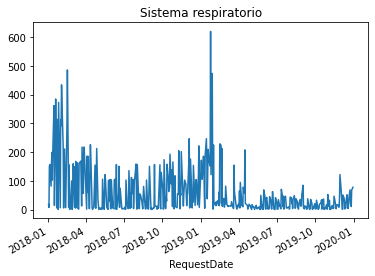

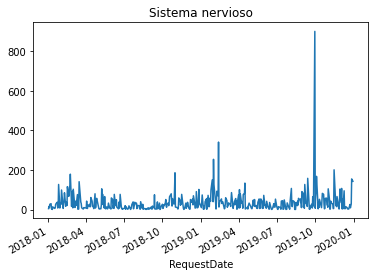

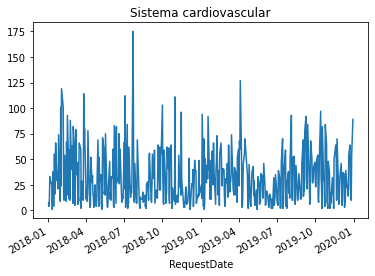

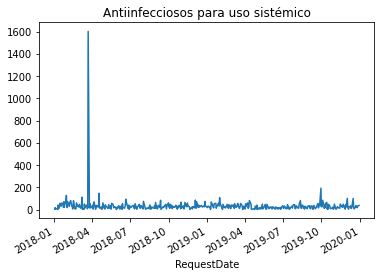

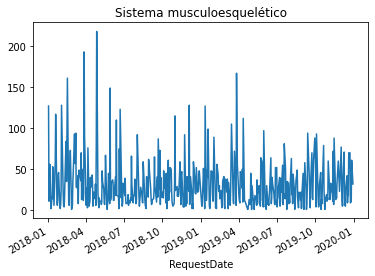

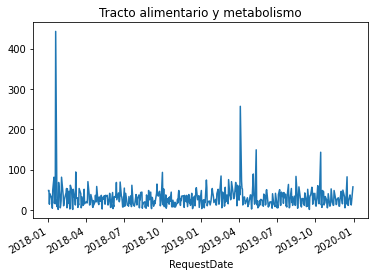

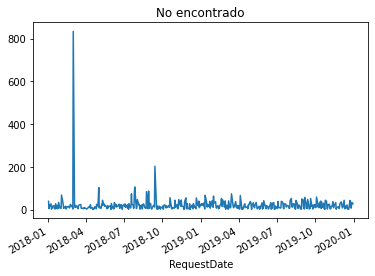

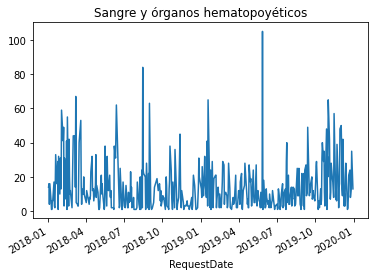

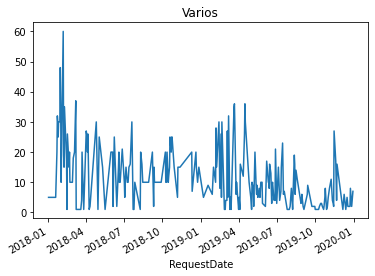

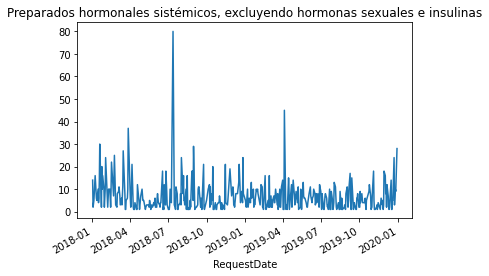

In [20]:
for i in top10_c['MedFamily']:
    plt.figure()
    PatentOrders[PatentOrders['MedFamily']==i].groupby('RequestDate').sum()['AmountRequested'].plot()
    plt.title(i)

_____________

In [21]:
  # All IncompleteOrders with RequestNumber'== are missing in PurchasedOrders
IncompleteOrders[~IncompleteOrders['RequestNumber'].isin(PurchasedOrders['RequestNumber'])].equals(IncompleteOrders[IncompleteOrders['RequestNumber']==0])

True

In [22]:
IncompleteOrders[IncompleteOrders['RequestNumber']!=0].shape

(1052, 15)

In [23]:
PurchasedOrders['MedCode'] = PurchasedOrders['MedCode'].astype(int)
PurchasedOrders

,RequestNumber,RequestDate,PurchaseNumber,OrderDate,RequiredDeliveryDate,SupplierName,MedCode,MedDescription,Outflow,AmountRequested,AmountPurchased
0,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304784,BOLENTAX (ENOXAPARINA) 40 MG/0.4 ML JER PRELL C/2,15.0,5.0,6
1,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304883,BOLENTAX (ENOXAPARINA) 60 MG/0.6 ML JER PRELL C/2,14.0,2.0,2
2,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3304284,FRESUBIN PLUS VAINILLA 236 ML. FÓRMULA ENTERAL,15.0,5.0,5
3,52670,2018-01-02,257734.0,2018-01-02,2018-01-03,DISTRIBUIDORA MEDICA CODIMED S.A. DE C.V.,3302098,NODESCRON 4MG AMPOLLETA (VECURONIO) PISA,39.0,40.0,50
4,52670,2018-01-02,257785.0,2018-01-02,2018-01-03,"NADRO, S.A.P.I. DE C.V.",3301771,SOMAZINA 1G AMP 4ML (CITICOLINA),424.0,10.0,10
5,52670,2018-01-02,257786.0,2018-01-02,2018-01-03,FARMACOS NACIONALES S.A. DE C.V. (FANASA),3301096,ENTEROGERMINA (ORAL)AMP 5ML (ESPORAS DE BACILL...,58.0,20.0,20
6,52670,2018-01-02,257786.0,2018-01-02,2018-01-03,FARMACOS NACIONALES S.A. DE C.V. (FANASA),3301315,MIACALCIC 100UI CAJA C/5 AMP (CALCITONINA),13.0,2.0,2
7,52689,2018-01-02,NaN,NaT,NaT,NaN,3301523,AVELOX (MOXIFLOXACINO) 400 MG TAB C/7,199.0,3.0,0
8,52689,2018-01-02,257792.0,2018-01-02,2018-01-03,"NADRO, S.A.P.I. DE C.V.",3301131,ADVANTAN (METILPREDNISOLONA) 1MG CREMA 15 GR,200.0,1.0,1
9,52689,2018-01-02,257792.0,2018-01-02,2018-01-03,"NADRO, S.A.P.I. DE C.V.",3301020,AFRIN ADULTO (OXIMETAZOLINA ) 0.050% SPRAY 20ML,197.0,2.0,2


### Merging PurchasedOrders with IncompleteOrders and PatentDrugs

In [24]:
#columns = list(np.intersect1d(IncompleteOrders.columns,PurchasedOrders.columns))
#columns = ['AmountPurchased', 'AmountRequested', 'MedCode','OrderDate', 'RequestDate', 'RequestNumber','RequiredDeliveryDate', 'SupplierName']

#Orders = PurchasedOrders.reset_index().merge(IncompleteOrders[IncompleteOrders['RequestNumber']!=0], on=columns, how='left').set_index('index').drop(columns=['MedDescription_y']).rename(columns={'MedDescription_x':'MedDescription'})
#Orders = Orders.reset_index().merge(PatentDrugs[['MedCode','MedPharmacon','MedFamily']], on='MedCode', how='left').set_index('index')

In [25]:
  ## See all 'duplicated' Purchased Orders
#temp_df = Orders.groupby('index').count().sort_values('SupplierName', ascending=False)
#Orders.loc[list(temp_df[temp_df['RequestNumber']>1].index), :].head()

In [26]:
  # Filtering only Incomplete Orders
#Orders[~Orders['OrderPercentageFulfillment'].isna()].head(7)

### Part 2: Top 10 Diccionaries

In [27]:
#GRAFICO DEL TIEMPO DE LOS MEDICAMENTOS VENDIDOS
#Merge Orders and Consumption
#PatentOrders.head()
#PatientConsumption.head()
PatientConsumption["MedCode"]=PatientConsumption["MedCode"].astype(int)
PatentOrders["MedCode"]=PatentOrders["MedCode"].astype(int)

In [29]:
#Market Prices for each drug
PatientConsumption.groupby(["MedCode","UnitaryCost"]).count()

ConsumptionDate  Department  ConsumptionNumber  \
MedCode UnitaryCost                                                   
1000255 73.28                      1           1                  1   
        83.50                      1           1                  1   
1000268 68.33                     11          11                 11   
        74.02                     98          98                 98   
        75.20                     29          29                 29   
        75.59                      3           3                  3   
        75.60                     30          30                 30   
        75.61                      6           6                  6   
        76.24                    123         123                123   
        76.64                     27          27                 27   
        78.15                     69          69                 69   
        78.56                    243         243                243   
        78.59                      4           4                  4   
        78.73                     63          63                 63   
        80.33                     65          65                 65   
        85.22                      7           7                  7   
        85.25                     83          83                 83   
1000280 940.54                     2           2                  2   
        945.39                    28          28                 28   
        960.51                     4           4                  4   
        965.65                     2           2                  2   
        1119.87                    1           1                  1   
        1119.93                    2           2                  2   
        1120.38                   16          16                 16   
        1179.35                   11          11                 11   
        1312.50                   15          15                 15   
        1367.54                   31          31                 31   
        2100.00                    1           1                  1   
1000294 783.25                     1           1                  1   
2400207 220.79                     1           1                  1   
...                              ...         ...                ...   
3500828 661.56                     1           1                  1   
3500829 269.50                     3           3                  3   
        296.43                     1           1                  1   
        296.45                     1           1                  1   
        308.19                     2           2                  2   
        308.31                     2           2                  2   
        320.63                     1           1                  1   
        353.40                     2           2                  2   
        411.08                     1           1                  1   
3600131 7386.10                   11          11                 11   
        7510.08                   14          14                 14   
        7607.83                    6           6                  6   
        7687.49                    2           2                  2   
        7979.90                    4           4                  4   
        8637.14                    2           2                  2   
3600183 2.23                       5           5                  5   
        216.32                     1           1                  1   
        285.00                     1           1                  1   
        305.00                     4           4                  4   
        380.00                     4           4                  4   
3600195 195.26                     2           2                  2   
        218.33                     1           1                  1   
        274.59                     1           1                  1   
3800003 570.00                    34         

In [34]:
#Get the average market prices for each drug
DrugMktPrice=PatientConsumption.groupby("MedCode").mean()
DrugMktPrice.head(7)

,ConsumptionNumber,AmmountConsumed,UnitaryCost,TotalCost
MedCode,,,,
1000255,5.702712e+06,1.000000,78.390000,85.070000
1000268,5.776963e+06,1.087108,78.086109,84.854228
1000280,5.576559e+06,1.044248,1173.143717,1243.456814
1000294,5.983552e+06,1.000000,783.250000,783.250000
2400207,5.487564e+06,1.000000,220.790000,220.790000
2900193,5.800344e+06,1.000000,504.829333,504.829333
2900217,5.682197e+06,1.000000,67.418750,67.418750


In [35]:
df=pd.merge(PatentOrders, DrugMktPrice, on="MedCode")

In [52]:
#Top 10 Missing
Top10Missing=df[df["AmountPurchased"]==0].groupby("MedDescription").count().sort_values("AmountRequested",ascending=False)[:10].index

In [55]:
#Top 10 Missing Quantity
Top10MissingQ=df[df["AmountPurchased"]==0].groupby("MedDescription").sum().sort_values("AmountRequested",ascending=False)[:10].index

In [65]:
#Top 10 Missing Relative to its Requests
veces_pedida=pd.DataFrame(PatentOrders.groupby('MedDescription').count()['RequestNumber']).sort_values('RequestNumber',ascending=False)[0:100].reset_index()
veces_faltante=pd.DataFrame(PatentOrders[PatentOrders['AmountPurchased']==0].groupby('MedDescription').count()['RequestDate']).reset_index()

veces_falto=pd.merge(veces_faltante,veces_pedida,on='MedDescription')
veces_falto['cociente']=veces_falto['RequestDate']/veces_falto['RequestNumber']
Top10MissingRelative=list(veces_falto.sort_values("cociente", ascending=False)[0:10].MedDescription)

In [72]:
top10_c= PatientConsumption.groupby('MedDescription').sum().sort_values('AmmountConsumed',ascending=False)[:10].reset_index()
Top10Consummed=list(top10_c.MedDescription)
Top10Consummed
#CALCULAR LA UTILIDAD DE LOS MEDICAMENTOS Y CUANTIFICARLA COMO COSTO DE OPORTUNIDAD DEL DESABASTO
#Proveedores a los que más se les compra

['COMBIVENT 0.5/2.5MG AMPOLLETA 2.5ML (IPRATROPIO/ SALBUTAMOL)',
 'MICCIL 0.5MG AMP 2ML (BUMETANIDA)',
 'FLIXOTIDE 2MG AMP 2ML (FLUTICASONA)',
 'PULMICORT 0.250MG 2ML AMP (BUDESONIDA)',
 'PROFENID IM (KETOPROFENO) 100MG/2ML AMP',
 'ENTEROGERMINA (ORAL)AMP 5ML (ESPORAS DE BACILLUS CLAUSII )',
 'SOMAZINA 1G AMP 4ML (CITICOLINA)',
 'DICYNONE 250MG AMP 2ML (ETAMSILATO)',
 'HEPARINA 1000UI 10ML AMPOLLETA (INHEPAR)',
 'FOSFOCIL IV 1G AMP (FOSFOMICINA)']

### Part 3: Time series Analysis

### Harmonizing months

In [128]:
AmmountCosummed=PatientConsumption.groupby(["ConsumptionDate","MedDescription"]).sum().reset_index()[["ConsumptionDate", "MedDescription", "AmmountConsumed"]]
AmmountCosummed.head()

,ConsumptionDate,MedDescription,AmmountConsumed
0,2018-01-31,ACC 200MG C/20 TAB EFERV (ACETILCISTEINA),1.0
1,2018-01-31,ACC 600MG TAB EFERV (ACETILCISTEINA),2.0
2,2018-01-31,ACELER CO 2% CREMA 15G(ACIDO FUSIDICO/BETAMETA...,2.0
3,2018-01-31,ACETA DIAZOL 250MG C/30 TAB(ACETAZOLAMIDA),2.0
4,2018-01-31,ACTRON 200 200MG C/10 CAPS (IBUPROFENO),1.0


In [133]:
#End of month values
df["MonthRequest"]=pd.to_datetime(df['RequestDate'].map(lambda x: str(x.year) + "/" + str(x.month) + "/"+str(x.days_in_month)))
AmmountRequested=df.groupby(["MonthRequest", "MedDescription"]).sum().reset_index()[["MonthRequest", "MedDescription", "AmountRequested"]]
AmmountRequested.head()

,MonthRequest,MedDescription,AmountRequested
0,2018-01-31,ACANOL 2MG C/12 TAB (LOPERAMIDA) SANOFI,2.0
1,2018-01-31,ACC 600MG TAB EFERV (ACETILCISTEINA),1.0
2,2018-01-31,ACETA DIAZOL 250MG C/30 TAB(ACETAZOLAMIDA),2.0
3,2018-01-31,ACTRON 400 400MG C/10 CAP (IBUPROFENO) LAB. BA...,25.0
4,2018-01-31,ACTRON 600 600MG C/10 TAB (IBUPROFENO) BAYER,30.0


In [130]:
#Pendiente purchased
#df["MonthOrder"]=pd.to_datetime(df['OrderDate'].map(lambda x: str(x.year) + "/" + str(x.month)))
#AmountPurchased=df.groupby(["MonthOrder", "MedDescription"]).sum().reset_index()[["MonthOrder", "MedDescription", "AmountPurchased"]]

#### Top 10 Missing Time series

1. Requested orders (Peticiones de la farmacia)
2. Cosummed drugs (Consumido por pacientes)

In [142]:
master_missing=pd.merge(AmmountCosummed[AmmountCosummed["MedDescription"].isin(Top10Missing)], AmmountRequested, left_on=["ConsumptionDate", "MedDescription"], right_on=["MonthRequest", "MedDescription"], how="left")

In [150]:
master_missing=master_missing.set_index("ConsumptionDate")

KeyError: 'ConsumptionDate'

''

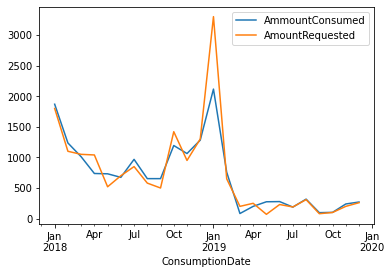

In [166]:
#For Loop
master_missing[master_missing["MedDescription"]=="COMBIVENT 0.5/2.5MG AMPOLLETA 2.5ML (IPRATROPIO/ SALBUTAMOL)"]["AmmountConsumed"].plot()
master_missing[master_missing["MedDescription"]=="COMBIVENT 0.5/2.5MG AMPOLLETA 2.5ML (IPRATROPIO/ SALBUTAMOL)"]["AmountRequested"].plot()
plt.legend()
;

#### Pasos a seguir
1. Agrupar por mes y medicamento (cuando purchase ==0) el Amount Requested.
2. Darle valor monetario a esas requisiciones. 